<a href="https://colab.research.google.com/github/jdshanbj/CLRS/blob/master/hw2_wyf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework 2.2

name:  Yifan Wang

Net ID: yw5458

#Preperation: Read in the "Advertising" data

In [2]:
from sklearn import datasets
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

# for 3d interactive plots
from ipywidgets import interact, fixed
from mpl_toolkits import mplot3d


%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
url = 'http://faculty.marshall.usc.edu/gareth-james/ISL/Advertising.csv'
df = pd.read_csv(url, index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


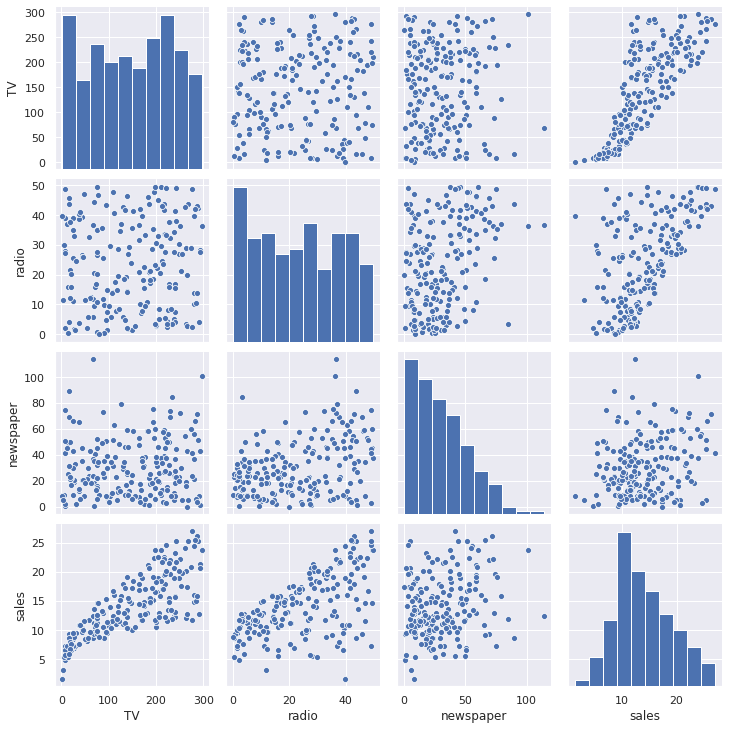

In [4]:
sns.pairplot(df);

#a.

From the images above, we can acknowledge that the TV, the radio are correlated with product sales. And the TV is correlated with the newspapers. The radio is also correlated with the newspapers.







Then we split the data into trainging data (70%) and test data (30%).

In [5]:
train_data, test_data = train_test_split(df, test_size=0.3)
train_data

,TV,radio,newspaper,sales
5,180.8,10.8,58.4,12.9
59,210.8,49.6,37.7,23.8
115,78.2,46.8,34.5,14.6
68,139.3,14.5,10.2,13.4
105,238.2,34.3,5.3,20.7
...,...,...,...,...
173,19.6,20.1,17.0,7.6
161,172.5,18.1,30.7,14.4
102,296.4,36.3,100.9,23.8
85,213.5,43.0,33.8,21.7


#b.


In [6]:
train_sales = train_data['sales']
TV_train_x = train_data[['TV']].to_numpy()     
radio_train_x = train_data[['radio']].to_numpy()          
newspaper_train_x = train_data[['newspaper']].to_numpy()
test_sales = test_data['sales']
TV_test_x = test_data[['TV']].to_numpy()
radio_test_x = test_data[['radio']].to_numpy()
newspaper_test_x = test_data[['newspaper']].to_numpy()
# TV_train_x

plots (TV,radio,newspaper):


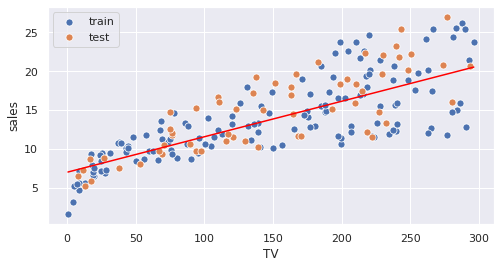

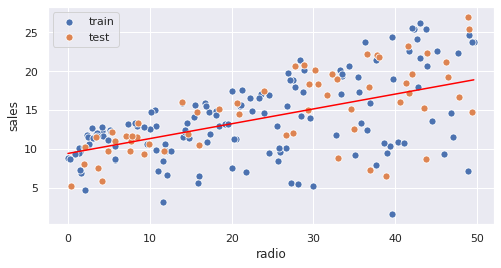

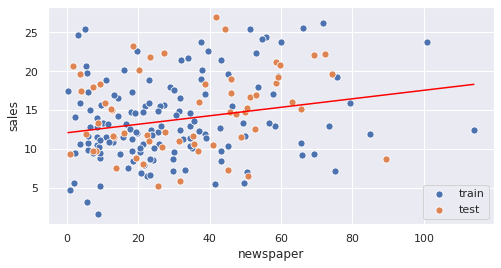

In [7]:
figure1 = plt.figure(num=1,figsize=(8, 4))
reg_noisy_TV = LinearRegression().fit(TV_train_x, train_sales)
x_TV_line = [np.min(TV_train_x), np.max(TV_train_x)]
y_TV_line = x_TV_line*reg_noisy_TV.coef_ + reg_noisy_TV.intercept_
sns.scatterplot(TV_train_x.squeeze(), train_sales, s=50, label='train');
sns.lineplot(x_TV_line, y_TV_line, color='red');
plt.xlabel('TV');
plt.ylabel('product sales');
sns.scatterplot(TV_test_x.squeeze(), test_sales, s=50, label='test');

figure2 = plt.figure(num=2,figsize=(8, 4))
reg_noisy_radio = LinearRegression().fit(radio_train_x, train_sales)
x_radio_line = [np.min(radio_train_x), np.max(radio_train_x)]
y_radio_line = x_radio_line*reg_noisy_radio.coef_ + reg_noisy_radio.intercept_
sns.scatterplot(radio_train_x.squeeze(), train_sales, s=50, label='train');
sns.lineplot(x_radio_line, y_radio_line, color='red');
plt.xlabel('radio');
plt.ylabel('product sales');
sns.scatterplot(radio_test_x.squeeze(), test_sales, s=50, label='test');

figure3 = plt.figure(num=3,figsize=(8, 4))
reg_noisy_newspaper = LinearRegression().fit(newspaper_train_x, train_sales)
x_newspaper_line = [np.min(newspaper_train_x), np.max(newspaper_train_x)]
y_newspaper_line = x_newspaper_line*reg_noisy_newspaper.coef_ + reg_noisy_newspaper.intercept_
sns.scatterplot(newspaper_train_x.squeeze(), train_sales, s=50, label='train');
sns.lineplot(x_newspaper_line, y_newspaper_line, color='red');
plt.xlabel('newspaper');
plt.ylabel('product sales');
sns.scatterplot(newspaper_test_x.squeeze(), test_sales, s=50, label='test');

the intercept and coefficients are below:

In [8]:
print("TV:")
print("Coefficient list: ", reg_noisy_TV.coef_)
print("Intercept: " , reg_noisy_TV.intercept_)
print("radio")
print("Coefficient list: ", reg_noisy_radio.coef_)
print("Intercept: " , reg_noisy_radio.intercept_)
print("newspaper:")
print("Coefficient list: ", reg_noisy_newspaper.coef_)
print("Intercept: " , reg_noisy_newspaper.intercept_)

TV:
Coefficient list:  [0.04558923]
Intercept:  7.016834254787978
radio
Coefficient list:  [0.19070766]
Intercept:  9.434674684274496
newspaper:
Coefficient list:  [0.05456779]
Intercept:  12.092622062364281


MSE and R2 on the training data and test data:

In [9]:
print("TV:")
train_sales_hat = reg_noisy_TV.intercept_ + np.dot(TV_train_x,reg_noisy_TV.coef_)
test_sales_hat = reg_noisy_TV.intercept_ + np.dot(TV_test_x,reg_noisy_TV.coef_)
mse_train_TV_est = 1.0/(len(train_sales)) * np.sum((train_sales - train_sales_hat)**2)
mse_test_TV_est = 1.0/(len(test_sales)) * np.sum((test_sales - test_sales_hat)**2)
# print((train_sales - train_sales_hat)**2)
R2_TV_train = 1-mse_train_TV_est
R2_TV_test = 1-mse_test_TV_est
print("MSE and R2 on training data:",mse_train_TV_est,R2_TV_train)
print("MSE and R2 on training data:",mse_test_TV_est,R2_TV_test)

print("TV:")
train_sales_hat = reg_noisy_TV.intercept_ + np.dot(TV_train_x,reg_noisy_TV.coef_)
test_sales_hat = reg_noisy_TV.intercept_ + np.dot(TV_test_x,reg_noisy_TV.coef_)
mse_train_TV_est = 1.0/(len(train_sales)) * np.sum((train_sales - train_sales_hat)**2)
mse_test_TV_est = 1.0/(len(test_sales)) * np.sum((test_sales - test_sales_hat)**2)
# print((train_sales - train_sales_hat)**2)
R2_TV_train = 1-mse_train_TV_est
R2_TV_test = 1-mse_test_TV_est
print("MSE and R2 on training data:",mse_train_TV_est,R2_TV_train)
print("MSE and R2 on training data:",mse_test_TV_est,R2_TV_test)

print("newspaper:")
train_sales_hat = reg_noisy_newspaper.intercept_ + np.dot(newspaper_train_x,reg_noisy_newspaper.coef_)
test_sales_hat = reg_noisy_newspaper.intercept_ + np.dot(newspaper_test_x,reg_noisy_newspaper.coef_)
mse_train_newspaper_est = 1.0/(len(train_sales)) * np.sum((train_sales - train_sales_hat)**2)
mse_test_newspaper_est = 1.0/(len(test_sales)) * np.sum((test_sales - test_sales_hat)**2)
# print((train_sales - train_sales_hat)**2)
R2_newspaper_train = 1-mse_train_newspaper_est
R2_newspaper_test = 1-mse_test_newspaper_est
print("MSE and R2 on training data:",mse_train_newspaper_est,R2_newspaper_train)
print("MSE and R2 on training data:",mse_test_newspaper_est,R2_newspaper_test)

TV:
MSE and R2 on training data: 10.713429225519159 -9.713429225519159
MSE and R2 on training data: 10.441124469845207 -9.441124469845207
TV:
MSE and R2 on training data: 10.713429225519159 -9.713429225519159
MSE and R2 on training data: 10.441124469845207 -9.441124469845207
newspaper:
MSE and R2 on training data: 25.61425004550317 -24.61425004550317
MSE and R2 on training data: 26.04340339295614 -25.04340339295614


Analysis:

#c.

## c.1

TV predicted sales ($\hat{y}$) and the actual sales ($y$)

Text(0.5, 0, 'predicted sales')

Text(0, 0.5, 'actual sales')

(6.374709915780059, 21.203519553629242, 0.33000000000000007, 28.27)

Text(0.5, 0, 'predicted sales')

Text(0, 0.5, 'actual sales')

(8.961719695781538, 19.366729442626628, 0.33000000000000007, 28.27)

Text(0.5, 0, 'predicted sales')

Text(0, 0.5, 'actual sales')

(11.798774504142665, 18.623568210136607, 0.33000000000000007, 28.27)

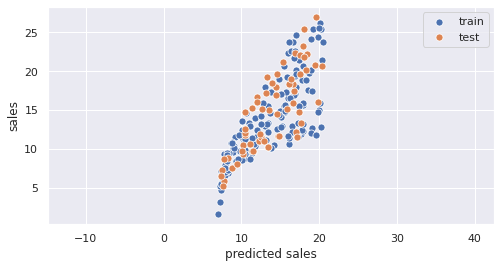

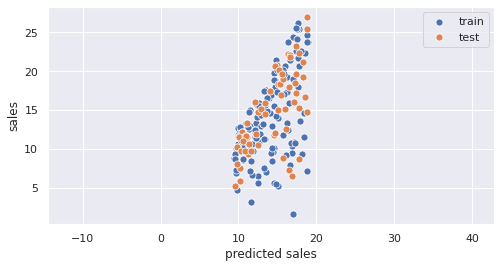

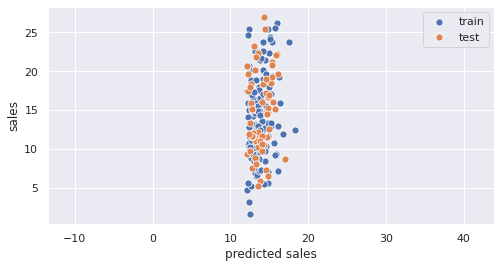

In [12]:
figure1 = plt.figure(num=1,figsize=(8, 4))
sns.scatterplot(TV_train_x.squeeze()*reg_noisy_TV.coef_ + reg_noisy_TV.intercept_, train_sales, s=50, label='train');
plt.xlabel('predicted sales');
plt.ylabel('actual sales');
sns.scatterplot(TV_test_x.squeeze()*reg_noisy_TV.coef_ + reg_noisy_TV.intercept_, test_sales, s=50, label='test');
plt.axis('equal')

figure2 = plt.figure(num=2,figsize=(8, 4))
sns.scatterplot(radio_train_x.squeeze()*reg_noisy_radio.coef_ + reg_noisy_radio.intercept_, train_sales, s=50, label='train');
plt.xlabel('predicted sales');
plt.ylabel('actual sales');
sns.scatterplot(radio_test_x.squeeze()*reg_noisy_radio.coef_ + reg_noisy_radio.intercept_, test_sales, s=50, label='test');
plt.axis('equal')

figure3 = plt.figure(num=3,figsize=(8, 4))
sns.scatterplot(newspaper_train_x.squeeze()*reg_noisy_newspaper.coef_ + reg_noisy_newspaper.intercept_, train_sales, s=50, label='train');
plt.xlabel('predicted sales');
plt.ylabel('actual sales');
sns.scatterplot(newspaper_test_x.squeeze()*reg_noisy_newspaper.coef_ + reg_noisy_newspaper.intercept_, test_sales, s=50, label='test');
plt.axis('equal')

Comments:



## c.2

In [39]:
TV_train_residual = TV_train_x.squeeze()*reg_noisy_TV.coef_ + reg_noisy_TV.intercept_ - train_sales
# TV_mean_residual = len(TV_train_residual)
# TV_train_residual.sum()
print("mean residual for TV regression model:",TV_train_residual.sum()/len(TV_train_residual))

radio_train_residual = radio_train_x.squeeze()*reg_noisy_radio.coef_ + reg_noisy_radio.intercept_ - train_sales
# radio_mean_residual = len(radio_train_residual)
# radio_train_residual.sum()
print("mean residual for radio regression model:",radio_train_residual.sum()/len(radio_train_residual))

newspaper_train_residual = newspaper_train_x.squeeze()*reg_noisy_newspaper.coef_ + reg_noisy_newspaper.intercept_ - train_sales
# newspaper_mean_residual = len(newspaper_train_residual)
# newspaper_train_residual.sum()
print("mean residual for newspaper regression model:",newspaper_train_residual.sum()/len(newspaper_train_residual))


mean residual for TV regression model: -1.2688263138573217e-16
mean residual for radio regression model: -5.582835780972216e-16
mean residual for newspaper regression model: -1.0150610510858574e-15


## c.3

Text(0.5, 0, 'predicted sales')

Text(0, 0.5, 'actual sales')

(6.374709915780059, 21.203519553629242, -8.413419472763161, 8.604936508213145)

Text(0.5, 0, 'predicted sales')

Text(0, 0.5, 'actual sales')

(8.961719695781538, 19.366729442626628, -9.762475778128312, 16.58427758599924)

Text(0.5, 0, 'predicted sales')

Text(0, 0.5, 'actual sales')

(11.798774504142665,
 18.623568210136607,
 -14.23463402067433,
 12.167456891482026)

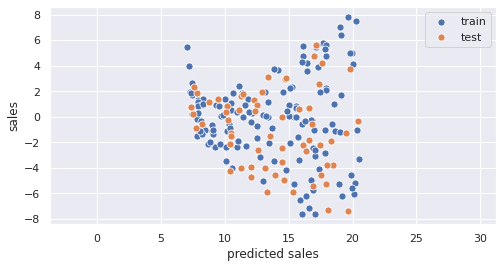

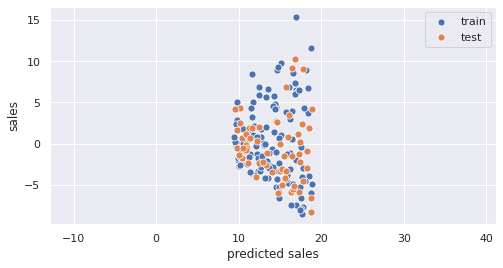

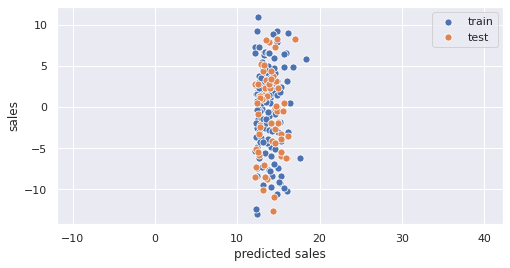

In [28]:
figure1 = plt.figure(num=1,figsize=(8, 4))
sns.scatterplot(TV_train_x.squeeze()*reg_noisy_TV.coef_ + reg_noisy_TV.intercept_, TV_train_x.squeeze()*reg_noisy_TV.coef_ + reg_noisy_TV.intercept_-train_sales, s=50, label='train');
plt.xlabel('predicted sales');
plt.ylabel('actual sales');
sns.scatterplot(TV_test_x.squeeze()*reg_noisy_TV.coef_ + reg_noisy_TV.intercept_, TV_test_x.squeeze()*reg_noisy_TV.coef_ + reg_noisy_TV.intercept_-test_sales, s=50, label='test');
plt.axis('equal')

figure2 = plt.figure(num=2,figsize=(8, 4))
sns.scatterplot(radio_train_x.squeeze()*reg_noisy_radio.coef_ + reg_noisy_radio.intercept_, radio_train_x.squeeze()*reg_noisy_radio.coef_ + reg_noisy_radio.intercept_-train_sales, s=50, label='train');
plt.xlabel('predicted sales');
plt.ylabel('actual sales');
sns.scatterplot(radio_test_x.squeeze()*reg_noisy_radio.coef_ + reg_noisy_radio.intercept_, radio_test_x.squeeze()*reg_noisy_radio.coef_ + reg_noisy_radio.intercept_-test_sales, s=50, label='test');
plt.axis('equal')

figure3 = plt.figure(num=3,figsize=(8, 4))
sns.scatterplot(newspaper_train_x.squeeze()*reg_noisy_newspaper.coef_ + reg_noisy_newspaper.intercept_, newspaper_train_x.squeeze()*reg_noisy_newspaper.coef_ + reg_noisy_newspaper.intercept_-train_sales, s=50, label='train');
plt.xlabel('predicted sales');
plt.ylabel('actual sales');
sns.scatterplot(newspaper_test_x.squeeze()*reg_noisy_newspaper.coef_ + reg_noisy_newspaper.intercept_, newspaper_test_x.squeeze()*reg_noisy_newspaper.coef_ + reg_noisy_newspaper.intercept_-test_sales, s=50, label='test');
plt.axis('equal')

## c.4

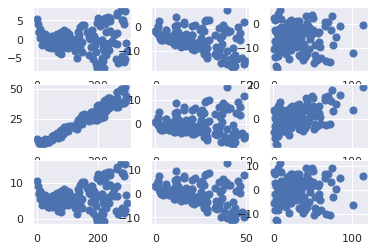

In [44]:
_, axes = plt.subplots(3,3)
#model (reg_noisy_TV.coef_, reg_noisy_TV.intercept_) 
#mode2 (reg_noisy_radio.coef_, reg_noisy_radio.intercept_) 
#mode3 (reg_noisy_newspaper.coef_, reg_noisy_newspaper.intercept_) 
#take model1 as example:
TVmodel_TV_residual =  TV_train_x.squeeze()*reg_noisy_TV.coef_ + reg_noisy_TV.intercept_ - train_sales
TVmodel_radio_residual =  radio_train_x.squeeze()*reg_noisy_TV.coef_ + reg_noisy_TV.intercept_ - train_sales
TVmodel_newspaper_residual =  newspaper_train_x.squeeze()*reg_noisy_TV.coef_ + reg_noisy_TV.intercept_ - train_sales
radiomodel_TV_residual =  TV_train_x.squeeze()*reg_noisy_radio.coef_ + reg_noisy_radio.intercept_ - train_sales
radiomodel_radio_residual =  radio_train_x.squeeze()*reg_noisy_radio.coef_ + reg_noisy_radio.intercept_ - train_sales
radiomodel_newspaper_residual =  newspaper_train_x.squeeze()*reg_noisy_radio.coef_ + reg_noisy_radio.intercept_ - train_sales
newspapermodel_TV_residual =  TV_train_x.squeeze()*reg_noisy_newspaper.coef_ + reg_noisy_newspaper.intercept_ - train_sales
newspapermodel_radio_residual =  radio_train_x.squeeze()*reg_noisy_newspaper.coef_ + reg_noisy_newspaper.intercept_ - train_sales
newspapermodel_newspaper_residual =  newspaper_train_x.squeeze()*reg_noisy_newspaper.coef_ + reg_noisy_newspaper.intercept_ - train_sales
# TV model
axes[0][0].scatter(TV_train_x, TVmodel_TV_residual, s = 50)
axes[0][1].scatter(radio_train_x, TVmodel_radio_residual, s = 50)
axes[0][2].scatter(newspaper_train_x, TVmodel_newspaper_residual, s = 50)
# radio model
axes[1][0].scatter(TV_train_x, radiomodel_TV_residual, s = 50)
axes[1][1].scatter(radio_train_x, radiomodel_radio_residual, s = 50)
axes[1][2].scatter(newspaper_train_x, radiomodel_newspaper_residual, s = 50)
# newspaper model
axes[2][0].scatter(TV_train_x, newspapermodel_TV_residual, s = 50)
axes[2][1].scatter(radio_train_x, newspapermodel_radio_residual, s = 50)
axes[2][2].scatter(newspaper_train_x, newspapermodel_newspaper_residual, s = 50)